<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 5: # Modelling - Decision Tree Classifier models</h2></div>
<div style="float:left"><h2> Created by Diego Villanueva</h2></div>
</div>
</div>

This notebook includes decision tree models that use unmodified and oversampled training datasets.

## Table of contents

5.1 Load data files

5.2 Decision tree function

5.3 Using unmodified dataset to train model

5.4 Model evaluation (unmodified)

5.5 Using oversampled dataset to train model

5.6 Model evaluation (oversampled)

In [9]:
# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# File saving
import joblib 

# Temporary directories for caching
from tempfile import mkdtemp

# Cross-validation
from sklearn.model_selection import cross_val_score

# Pipeline building
from sklearn.pipeline import Pipeline

# Grid search
from sklearn.model_selection import GridSearchCV

### 5.1 Load data files

In [20]:
X_rem = joblib.load("../data/Preprocessed_data/X_rem.pkl") # Unmodified dataset
y_rem = joblib.load("../data/Preprocessed_data/y_rem.pkl") # Unmodified dataset

X_rem_os = joblib.load("../data/Preprocessed_data/X_rem_oversampled.pkl") # Over sampled dataset
y_rem_os = joblib.load("../data/Preprocessed_data/y_rem_oversampled.pkl") # Over sampled dataset

X_test = joblib.load("../data/Preprocessed_data/X_test.pkl") # not scaled dataset
y_test = joblib.load("../data/Preprocessed_data/y_test.pkl") #unmodified dataset

### 5.2 Decision tree function

In [3]:
def decision_tree_grid_search(X_train, y_train, max_depths=None, min_samples_leaves=None, criteria=None, cv=5, verbose=5):

    # Create a directory that will be used to cache the pipeline results
    cachedir = mkdtemp()

    # Define the parameters to be used if other information is not provided
    if max_depths is None:
        max_depths = [2, 5, 10, 20]
    if min_samples_leaves is None:
        min_samples_leaves = [1, 3, 5, 10]
    if criteria is None:
        criteria = ['gini', 'entropy']

    # Create the pipeline
    estimators = [('normalise', MinMaxScaler()), 
                  ('dt', DecisionTreeClassifier(max_depth=3))]
    pipe = Pipeline(estimators, memory=cachedir)

    # Define parameter grid
    param_grid = {
        'dt__max_depth': max_depths,
        'dt__min_samples_leaf': min_samples_leaves,
        'dt__criterion': criteria
    }

    # Create the grid search and fit it
    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, verbose=verbose, n_jobs=-1, refit=True)

    #Fit the decision tree with grid search
    fitted_dec_tree_gs = grid_search.fit(X_train, y_train)

    # Return the results
    return {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_,
        'fitted_gs': fitted_dec_tree_gs
    }


### 5.3 Using unmodified dataset to train model

In [4]:
unmodified_results = decision_tree_grid_search(X_rem, y_rem)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.3s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.3s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.3s
[CV 4/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.3s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.4s
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.4s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.4s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   0.7s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 tot

### 5.4 Model evaluation (unmodified)


In [21]:
# Create confusion matrix

# Get class predictions
y_pred = unmodified_results['best_estimator'].predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Diagnosis", "Predicted Positive Diagnosis"],
    index=["True Negative Diagnosis", "True Positive Diagnosis"]
)

display(cf_df)

,Predicted Negative Diagnosis,Predicted Positive Diagnosis
True Negative Diagnosis,63086,1025
True Positive Diagnosis,10540,1453


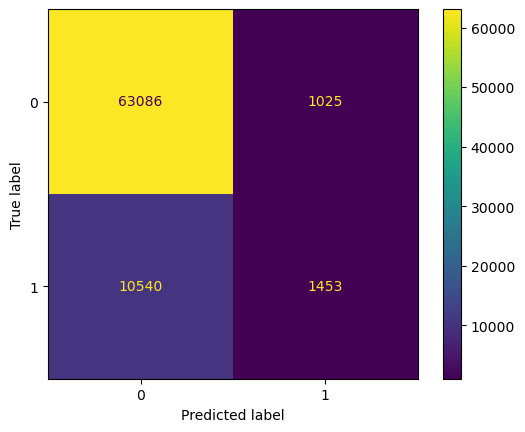

In [22]:
# Create visualisation of confusion matrix
ConfusionMatrixDisplay.from_estimator(unmodified_results['best_estimator'], X_test, y_test);

Interpretation:

    The results of the confusion matrix are as follows:

    True Negative:  63,086

    False Positive: 1,025

    False Negative: 10,540

    True Positive:  1,453

In [6]:
# Classification Report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     64111
           1       0.59      0.12      0.20     11993

    accuracy                           0.85     76104
   macro avg       0.72      0.55      0.56     76104
weighted avg       0.81      0.85      0.80     76104



### Observations

For 0: 
- The precision of 0.86 means that 14% of the predicitons as not having diabetes were in fact positive.
- The recall of 0.98 means that 2% of the negative diagnosis were missed by the model as they were classified as being positive

For 1: 
- The precision of 0.59 means that 41% of the predicitons as having diabetes were in fact negative 
- The recall of 0.12 indicates that 88% of the diagnosis that were positive  were missed by the model and were classified as being negative for diabetes



The model shows a very low F1 score of 0.20, indicating that the balance between recall and precision across the various classes could be improved. 

To improve the model's performance, it is recommended to closely examine instances where the sentiment was incorrectly predicted. 

Analysing these examples can help identify if there are specific health indicators that were mistakenly omitted, which could lead to more accurate predictions in the future.

In [18]:
# Regenerate scores
y_proba = unmodified_results['best_estimator'].predict_proba(X_test)[:,1]

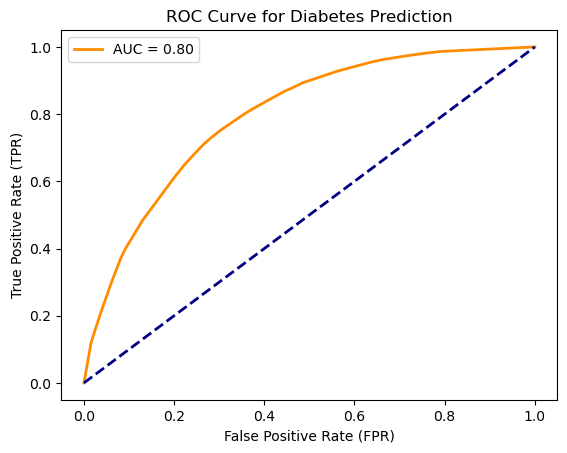

In [10]:
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend(loc="best")
plt.show()

### Observations
The Area Under the Curve (AUC) of this model shows that the probability of distinguishing between a positive result and a negative result is 80%. This can be considered a good model.

### 5.5 Using oversampled dataset to train model

In [12]:
oversampled_results = decision_tree_grid_search(X_rem_os, y_rem_os)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.716 total time=   1.9s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.714 total time=   2.0s
[CV 4/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.715 total time=   2.0s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.695 total time=   2.1s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.695 total time=   0.8s
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.716 total time=   0.8s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.714 total time=   0.8s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.710 total time=   1.3s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.710 tot

### 5.6 Model evaluation (oversampled)

In [23]:
# Create confusion matrix

# Get class predictions
y_pred = oversampled_results['best_estimator'].predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Diagnosis", "Predicted Positive Diagnosis"],
    index=["True Negative Diagnosis", "True Positive Diagnosis"]
)

display(cf_df)

,Predicted Negative Diagnosis,Predicted Positive Diagnosis
True Negative Diagnosis,52933,11178
True Positive Diagnosis,6071,5922


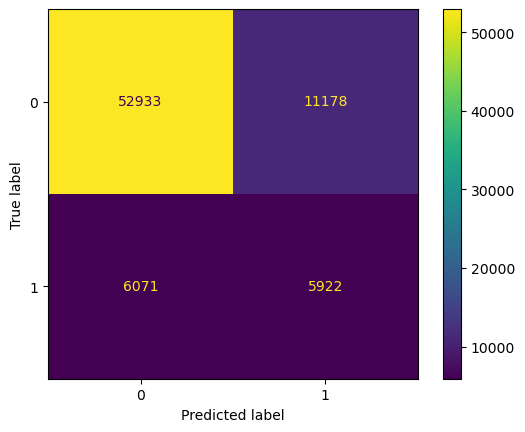

In [24]:
# Create visualisation of confusion matrix
ConfusionMatrixDisplay.from_estimator(oversampled_results['best_estimator'], X_test, y_test);

In [14]:
# Classification Report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     64111
           1       0.35      0.49      0.41     11993

    accuracy                           0.77     76104
   macro avg       0.62      0.66      0.63     76104
weighted avg       0.81      0.77      0.79     76104



### Observations

Looking at the errors:

For 0: 
- The precision of 0.90 means that 10% of the predicitons as not having diabetes were in fact positive.
- The recall of 0.83 means that 17% of the negative diagnosis were missed by the model as they were classified as being positive

For 1: 
- The precision of 0.35 means that 75% of the predicitons as having diabetes were in fact negative 
- The recall of 0.49 indicates that 51% of the diagnosis that were positive  were missed by the model and were classified as being negative for diabetes



The model shows a very low F1 score of 0.41, indicating that the balance between recall and precision across the various classes could be improved. 

To improve the model's performance, it is recommended to closely examine instances where the sentiment was incorrectly predicted. 

Analysing these examples can help identify if there are specific health indicators that were mistakenly omitted, which could lead to more accurate predictions in the future.

In [15]:
# Regenerate scores
y_proba = oversampled_results['best_estimator'].predict_proba(X_test)[:,1]

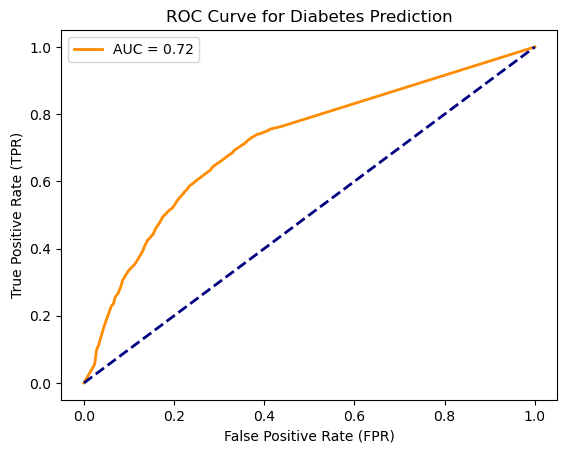

In [16]:
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend(loc="best")
plt.show()

### Observations
Compared to the previous model, the Area Under the Curve (AUC) of this model shows that the probability of distinguishing between a positive result and a negative result is 72%. This is lower than all the other models developed and therefore, it is not a preferred model.